<a href="https://www.kaggle.com/fernandobordi/fb-visualizaci-n-graficaci-n-b-sica-parte-ii?scriptVersionId=88414417" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Parte II: gráficar datos

Este cuaderno tiene una **primera parte**, [sobre visualización de datos](https://www.kaggle.com/fernandobordi/fb-visualizaci-n-graficaci-n-b-sica-parte-i), en el siguiente enlace

In [1]:
# Práctica: se presenta un caso de análisis de datos para comprender los elementos básicos
# de visualización de datos con la librería del lenguaje Python
# Fernando Bordignon - http://saberesdigitales.unipe.edu.ar
 
# Vamos a empezar nuestro programa Python cargando una serie de librerías 
# que nos van a permitir manejar y graficar datos

import pandas as pd      # manejo de estructuras de datos 
import geopandas as gpd  # manejo de datos geográficos
import math              # funciones matemáticas
from datetime import datetime, date, time, timedelta # manejo de fechas
import matplotlib.pyplot as plt # librería para graficar datos 

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.0-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


A continuación vamos a cargar nuestro **juego de datos** que corresponde **datos diarios COVID** de distintas provincias del centro de Argentina (Buenos Aires, La Pampa, Santa Fe, Córdoba, Entre Ríos y el distrito CABA). Los datos están en formato csv, almacenados en un espacio de Kaggle. Solamente nos vamos a quedar con una serie de columnas o atributos que nos interesan.

**Consejo**: para aprender a analizar y graficar datos con Python te recomiendo que armes tus propios cuadernos (notebooks) en Kaggle y vayas siguiendo el paso a paso (lo primero es que gestiones tu cuenta personal). Como siempre, para asistencia extra está Google y las comunidades de usuarios.

**Consejo**: te recomiendo que descargues el archivo cvs a tu computadora y lo explores con una herramienta de planilla de cálculo. De esta manera podrás comprender mejor la estructura del archivo de datos a trabajar. Al archivo lo descargas desde la pestaña "data" en la página principal del presente protecto.

**Tip**: recuerda que en cada cambio que realices o nuevo código que incluyas debes dar "run" a tu proyecto. En principio recomiendo trabajar con "run all"

**Tip:** regularmente graba versiones de tu proyecto con "**save version**"

In [2]:
# Carga de datos de un archivo cvs a un dataframe. Los dataframes son estructuras de datos Python provistas por la librería "pandas"

covid = pd.read_csv("../input/covid19arg/2022-01-06-DsNacion-ARG-centro.csv", encoding='latin-1')

# Se convierte a dato tipo fecha la columna "fecha"

covid['fecha'] = pd.to_datetime(covid['fecha'])

# Se extraen los días del mes de octubre del año 2021.  Se aplica un filtro al dataframe "covid"
# El resultado es almacenado en un dataframe llamado "covid" - fechas expresadas como mes/día/año

covid_mayo = covid[((covid.fecha>="5/1/2021") & (covid.fecha<="5/31/2021"))]

# Se extraen los atributos de interes para trabajar el caso, el resto se elimina

covid_mayo = covid_mayo[['ubicacion','fecha', 'fallecidos','terapia', 'diagnosticos', 'internados']]

covid_mayo.to_csv("2021.csv") # si te interes puede exportar un dataframe a un archivo csv, editable con Excel. Descárgalo de la zona "data"


Vamos a realizar nuestro **primer gráfico** con datos del dataframe "covid_mayo". Para ellos utilizaremos funciones de la librería **Maptolib,** la cual fue declarada al inicio de este cuaderno.

Primero, nos gustaría ver, para la provincia de de Buenos Aires como fue el desarrollo mensual de los diagnósticos realizados.


In [3]:
# Filtrado de datos para visualizar

covid_mayo_buenos_aires = covid_mayo[(covid_mayo['ubicacion']=="buenos aires")] # se extraen registros de Buenos Aires

covid_mayo_buenos_aires = covid_mayo_buenos_aires.sort_values(["fecha"]) # se ordena por fecha el dataframe

y = covid_mayo_buenos_aires['diagnosticos'] # se definen los datos del eje y
x = covid_mayo_buenos_aires['fecha']        # se definen los datos del eje x

covid_mayo_buenos_aires
 


,ubicacion,fecha,fallecidos,terapia,diagnosticos,internados
370,buenos aires,2021-05-01,74,21,14852,124
401,buenos aires,2021-05-02,77,19,12750,74
429,buenos aires,2021-05-03,65,12,10510,65
460,buenos aires,2021-05-04,105,38,24089,246
490,buenos aires,2021-05-05,237,64,24514,313
521,buenos aires,2021-05-06,257,68,16512,265
551,buenos aires,2021-05-07,144,37,23237,152
582,buenos aires,2021-05-08,73,7,21907,73
613,buenos aires,2021-05-09,19,3,6426,21
643,buenos aires,2021-05-10,4,3,13549,8


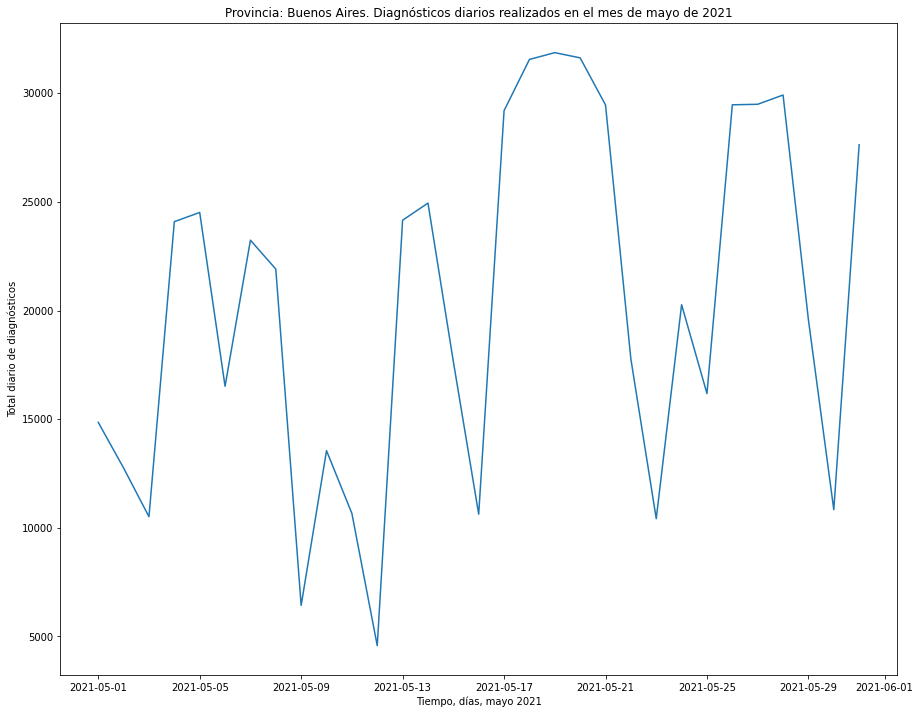

In [4]:
# Gráfico de lineas (tipo plot)

grafico_1 = plt.figure(figsize = (15, 12))    # se crea un objeto gráfico de un determinado tamaño (alto y ancho en pulgadas)
grafico_1 = plt.plot(x, y)  # se asocian los datos al gráfico tipo de líneas
grafico_1 = plt.title("Provincia: Buenos Aires. Diagnósticos diarios realizados en el mes de mayo de 2021") # Se agrega un título
grafico_1 = plt.xlabel('Tiempo, días, mayo 2021')      # rótulo para eje x
grafico_1 = plt.ylabel('Total diario de diagnósticos') # rótulo para eje y
grafico_1 = plt.show()                                 # se muestra el gráfico

A continuación vamos construir, con los mismos datos, **un gráfico de puntos** que muestre los fallecidos diarios

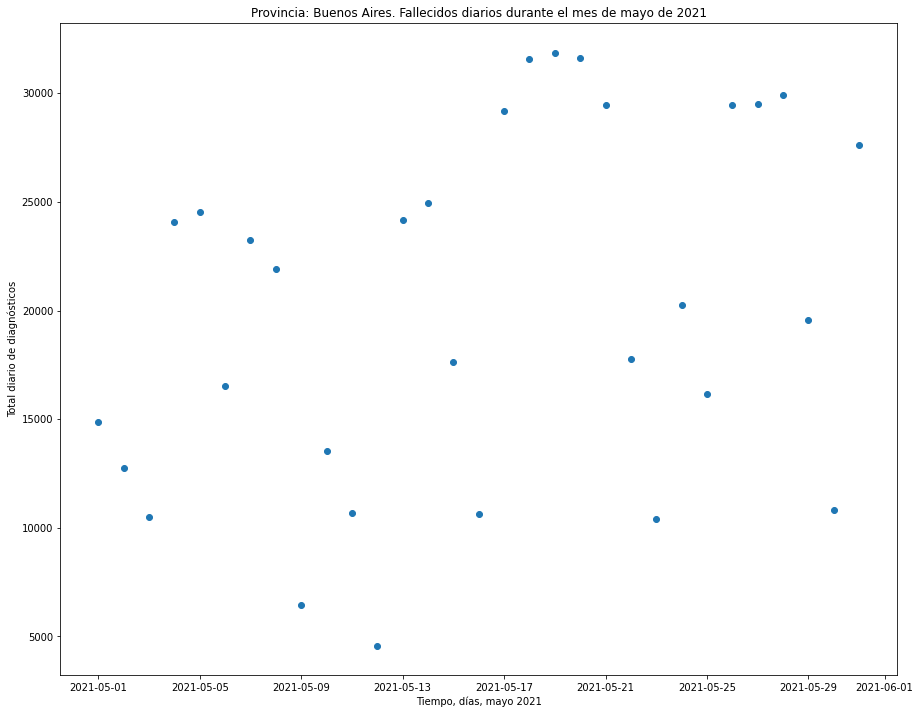

In [5]:
# Gráfico de puntos (tipo scatter)

covid_mayo_buenos_aires = covid_mayo[(covid_mayo['ubicacion']=="buenos aires")] # se extraen registros de Buenos Aires

covid_mayo_buenos_aires = covid_mayo_buenos_aires.sort_values(["fecha"]) # se ordena por fecha el dataframe

y = covid_mayo_buenos_aires['diagnosticos'] # se definen los datos del eje y
x = covid_mayo_buenos_aires['fecha']        # se definen los datos del eje x
 
grafico_2 = plt.figure(figsize = (15, 12))    # se crea un objeto gráfico de un determinado tamaño (alto y ancho en pulgadas)
grafico_2 = plt.scatter(x, y)  # se asocian los datos al gráfico tipo de puntos
grafico_2 = plt.title("Provincia: Buenos Aires. Fallecidos diarios durante el mes de mayo de 2021") # Se agrega un título
grafico_2 = plt.xlabel('Tiempo, días, mayo 2021')      # rótulo para eje x
grafico_2 = plt.ylabel('Total diario de diagnósticos') # rótulo para eje y

grafico_2 = plt.savefig("bsas-5-2021-fallecidos.png", format='png', dpi=150)  # es posible exportar el gráfico a un archivo. 
                                                                     # revisa el panel "data" (zona "output) de la derecha de la pantalla

grafico_2 = plt.show()                                 # se muestra el gráfico

Un tercer tipo de gráfico es el de barras apiladas, acá presentamos unocon los internados diarios en terapia

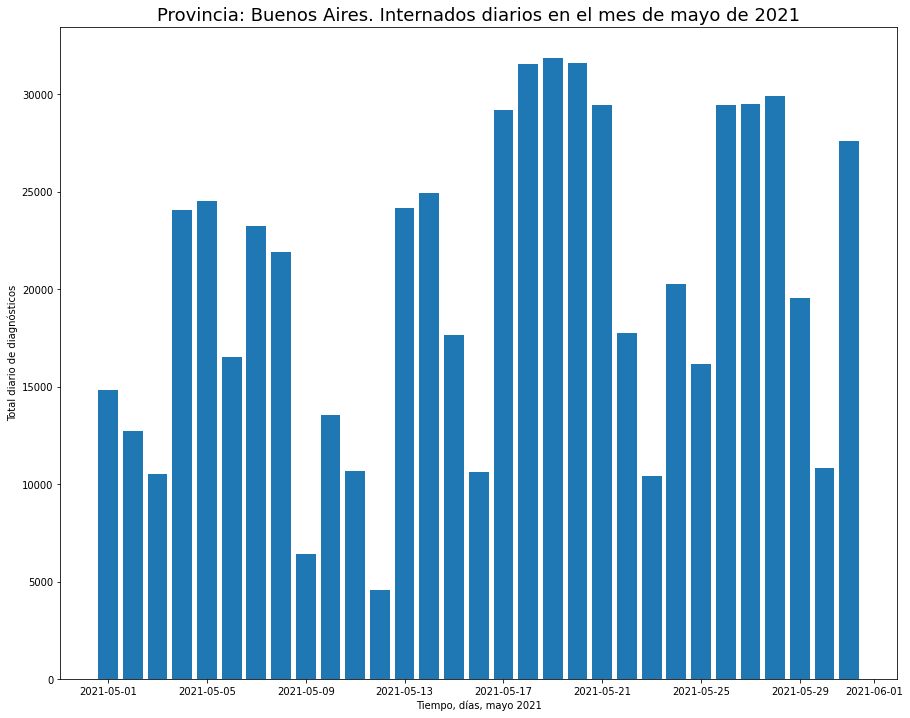

In [6]:
# Gráfico de barras (tipo bar)

covid_mayo_buenos_aires = covid_mayo[(covid_mayo['ubicacion']=="buenos aires")] # se extraen registros de Buenos Aires

covid_mayo_buenos_aires = covid_mayo_buenos_aires.sort_values(["fecha"]) # se ordena por fecha el dataframe

y = covid_mayo_buenos_aires['diagnosticos'] # se definen los datos del eje y
x = covid_mayo_buenos_aires['fecha']        # se definen los datos del eje x
 
grafico_2 = plt.figure(figsize = (15, 12))    # se crea un objeto gráfico de un determinado tamaño (alto y ancho en pulgadas)
grafico_2 = plt.bar(x, y)  # se asocian los datos al gráfico tipo de puntos
grafico_2 = plt.title("Provincia: Buenos Aires. Internados diarios en el mes de mayo de 2021",
    fontsize=18,) # Se agrega un título
grafico_2 = plt.xlabel('Tiempo, días, mayo 2021')      # rótulo para eje x
grafico_2 = plt.ylabel('Total diario de diagnósticos') # rótulo para eje y

grafico_2 = plt.show()                                 # se muestra el gráfico

Es común que sobre un mismo gráfico quisiéramos representar **dos juegos de datos** distintos. Por ejemplo internados e internados en terapia. Veamos como es esto en un gráfico de líneas

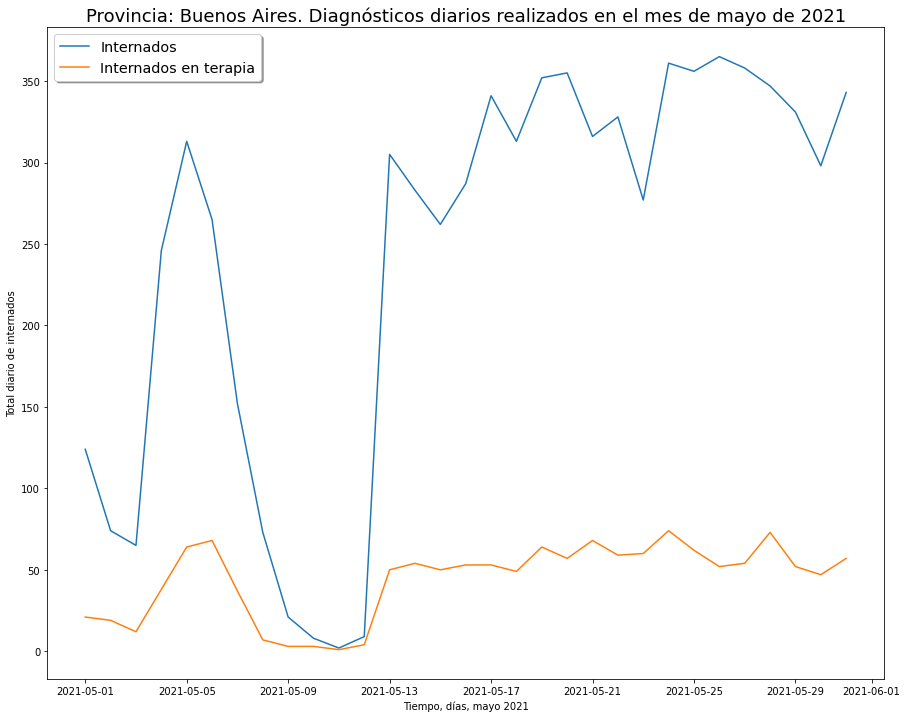

In [7]:
# Gráfico de lineas (tipo plot) con dos series de datos

y1 = covid_mayo_buenos_aires['internados']  # se definen los datos del eje y, serie 2
y2 = covid_mayo_buenos_aires['terapia']     # se definen los datos del eje y, serie 1
x  = covid_mayo_buenos_aires['fecha']        # se definen los datos del eje x
 
grafico_4 = plt.figure(figsize = (15, 12))    # se crea un objeto gráfico de un determinado tamaño (alto y ancho en pulgadas)
grafico_4 = plt.plot(x, y1, label="Internados")              # se asocian los datos al gráfico tipo de líneas
grafico_4 = plt.plot(x, y2, label= "Internados en terapia")  # se asocian los datos al gráfico tipo de líneas
grafico_4 = plt.title("Provincia: Buenos Aires. Diagnósticos diarios realizados en el mes de mayo de 2021",
    fontsize=18) # Se agrega  un título
grafico_4 = plt.xlabel('Tiempo, días, mayo 2021')      # rótuax.legend(loc='upper center', shadow=True, fontsize='x-large')lo para eje x
grafico_4 = plt.ylabel('Total diario de internados')  # rótulo para eje y
grafico_4 = plt.legend(loc='upper left', shadow=True, fontsize='x-large') # especifica donde se muestra la caja de la leyenda
grafico_4 = plt.show() 
grafico_4 = plt



Otra alternativa para el gráfico anterior es verlo en modo de barras. Solo hay que cambiar el método plot por bar en dos instrucciones. También observa que podemos hacer el gráfico sin necesidad de asignar los datos a un objeto extra.

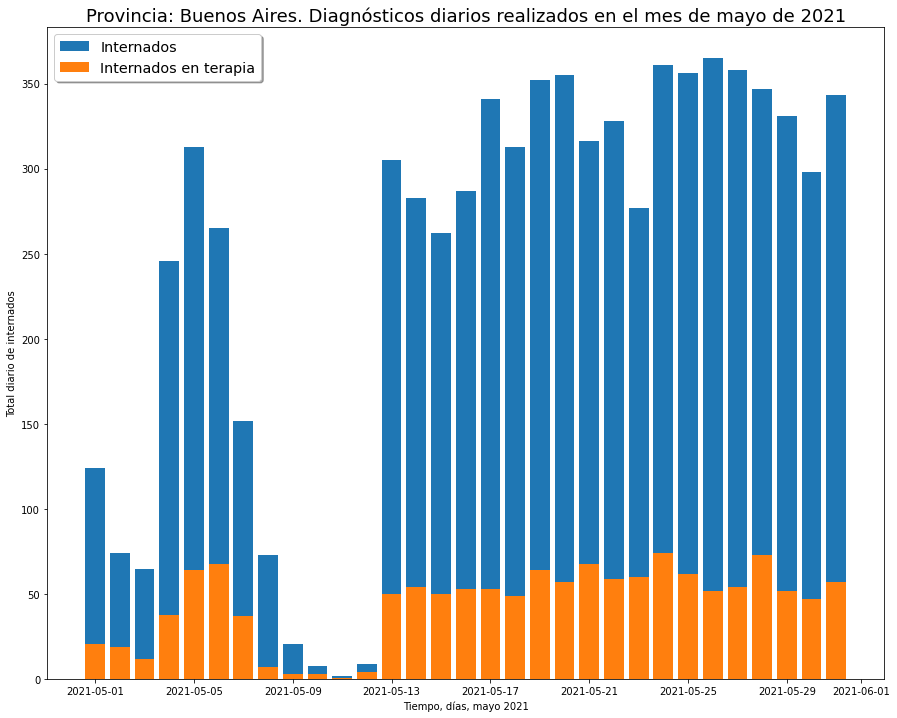

In [8]:
# Gráfico de barras con dos series de datos

y1 = covid_mayo_buenos_aires['internados']  # se definen los datos del eje y, serie 2
y2 = covid_mayo_buenos_aires['terapia']     # se definen los datos del eje y, serie 1
x  = covid_mayo_buenos_aires['fecha']        # se definen los datos del eje x 
    
plt.figure(figsize = (15, 12))    # se crea un objeto gráfico de un determinado tamaño (alto y ancho en pulgadas)
plt.bar(x, y1, label="Internados")              # se asocian los datos al gráfico tipo de líneas
plt.bar(x, y2, label= "Internados en terapia")  # se asocian los datos al gráfico tipo de líneas
plt.title("Provincia: Buenos Aires. Diagnósticos diarios realizados en el mes de mayo de 2021",fontsize=18) # Se agrega  un título
plt.xlabel('Tiempo, días, mayo 2021')      # rótuax.legend(loc='upper center', shadow=True, fontsize='x-large')lo para eje x
plt.ylabel('Total diario de internados')  # rótulo para eje y
plt.legend(loc='upper left', shadow=True, fontsize='x-large') # especifica donde se muestra la caja de la leyenda

plt.show() 

In [9]:
# Primero vamos a crear un dataframe con las dos series de datos a graficar. Para eso concatenamos las series individuales en un nuevo
# dataframe llamado df_covid_mayo_buenos_aires

y1 = covid_mayo_buenos_aires['internados']  # se definen los datos del eje y, serie 2
y2 = covid_mayo_buenos_aires['terapia']     # se definen los datos del eje y, serie 1
x  = covid_mayo_buenos_aires['fecha']        # se definen los datos del eje x 

df_covid_mayo_buenos_aires = pd.concat([x,y1,y2], axis=1)
df_covid_mayo_buenos_aires.columns = ["fecha","internados","terapia"]
df_covid_mayo_buenos_aires.head()

,fecha,internados,terapia
370,2021-05-01,124,21
401,2021-05-02,74,19
429,2021-05-03,65,12
460,2021-05-04,246,38
490,2021-05-05,313,64


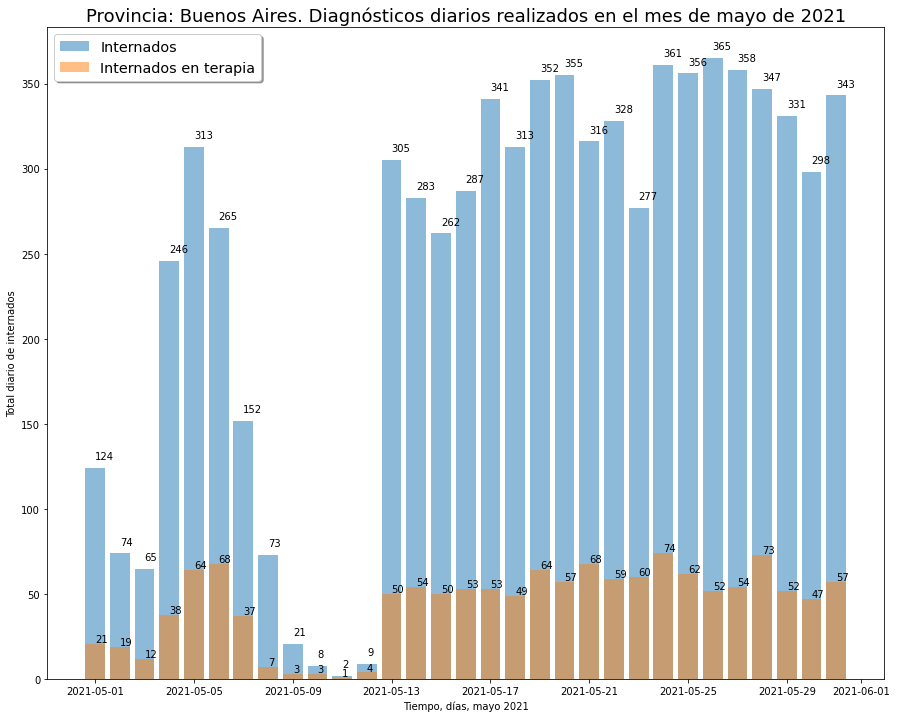

In [10]:
# Gráfico de barras con visualización de datos asociados a cada barra

plt.figure(figsize = (15, 12))    # se crea un objeto gráfico de un determinado tamaño (alto y ancho en pulgadas)
plt.bar(x, y1, label="Internados", alpha=0.5)              # se asocian los datos al gráfico tipo de líneas
plt.bar(x, y2, label= "Internados en terapia", alpha=0.5)  # se asocian los datos al gráfico tipo de líneas
plt.title("Provincia: Buenos Aires. Diagnósticos diarios realizados en el mes de mayo de 2021",fontsize=18) # Se agrega  un título
plt.xlabel('Tiempo, días, mayo 2021')      # rótuax.legend(loc='upper center', shadow=True, fontsize='x-large')lo para eje x
plt.ylabel('Total diario de internados')  # rótulo para eje y
plt.legend(loc='upper left', shadow=True, fontsize='x-large') # especifica donde se muestra la caja de la leyenda

# La siguiente parte del programa está organizada por un instrucciónn de ciclo (for)
# que nos va a ayudar a recorrer cada fila del dataframe que estamos graficando (df_covid_mayo_buenos_aires)
# Recuerden que cada fila corresponde a un regiistro diario de internados e internados en terapia
# En tres variables xx,yy,zz extraemos los datos de la fila y luego con el método annotate 
# mostramos los valores para los casos de internados y terapia

for i in df_covid_mayo_buenos_aires.index:
    xx=df_covid_mayo_buenos_aires["fecha"][i]
    yy=df_covid_mayo_buenos_aires["internados"][i]
    zz=df_covid_mayo_buenos_aires["terapia"][i]
    plt.annotate('{}'.format(yy), xy=(xx, yy+5))
    plt.annotate('{}'.format(zz), xy=(xx, zz+1))
            
plt.show() 
 
    

Por ahora, un último ejemplo de gráfico de puntos de internados donde se asocia a cada punto sus valores

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


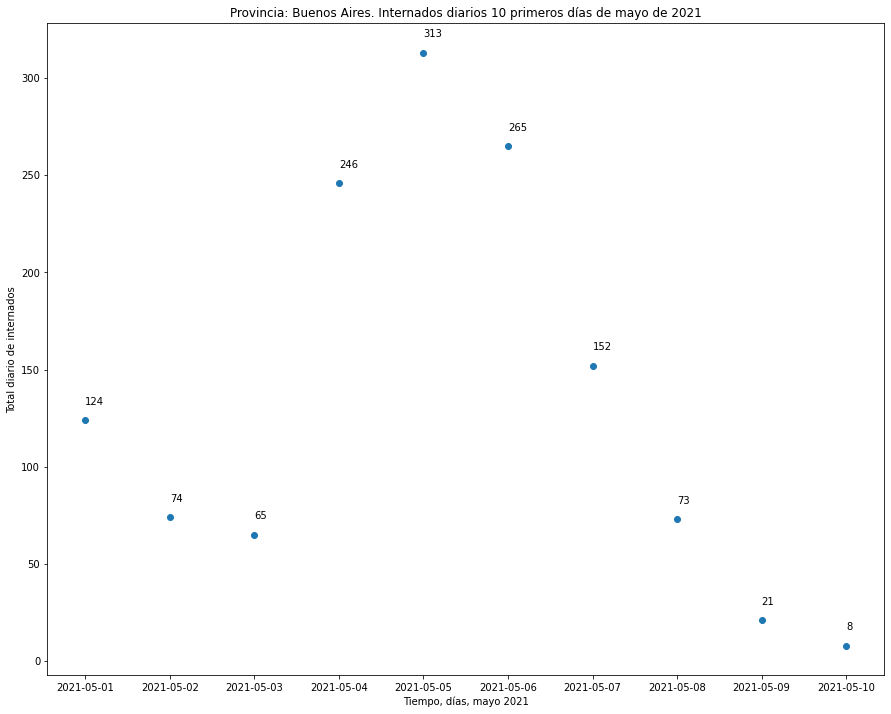

In [11]:
# Gráfico de puntos (tipo scatter) con etiquetas de datos numéricos

# Extraemos los primeros 10 días del mes de mayo
covid_mayo_10d = covid_mayo_buenos_aires[((covid.fecha>="5/1/2021") & (covid.fecha<="5/10/2021"))]

y = covid_mayo_10d['internados']  # se definen los datos del eje y, serie 2
x = covid_mayo_10d['fecha']        # se definen los datos del eje x 

plt.figure(figsize = (15, 12))    # se crea un objeto gráfico de un determinado tamaño (alto y ancho en pulgadas)
plt.scatter(x, y)  # se asocian los datos al gráfico tipo de puntos
plt.title("Provincia: Buenos Aires. Internados diarios 10 primeros días de mayo de 2021") # Se agrega un título
plt.xlabel('Tiempo, días, mayo 2021')      # rótulo para eje x
plt.ylabel('Total diario de internados') # rótulo para eje y

for i in covid_mayo_10d.index:
    xx=covid_mayo_10d["fecha"][i]
    yy=covid_mayo_10d["internados"][i]
    #plt.annotate('{}'.format(xx), xy=(xx, yy+2))
    plt.annotate('{}'.format(yy), xy=(xx, yy+8))
    
plt.show()      

**Fin del cuaderno**, ya hay bastantes pistas acerca de como trabajar con dataframes y luego graficar datos. Ahora te toca a ti buscar los ejemplos que te motiven a continuar y a hacer tuyas (y fluidas) estas herramientas de análisis y visualización de datos.

*Fino ad un'altra volta cari amici!*